In [1]:
pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r"C:\Users\fenil\OneDrive\Documents\Desktop\churn data\Customer_Churn.csv"
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# 3. TotalCharges ને numberમાં convert કરો (errors='coerce' → invalid values ને NaN બનાવશે)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# 4. Null values ને 0 થી replace કરવું
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum() .sum()

np.int64(0)

In [8]:
# 5. Describe (numeric summary)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# 6. જો categorical columns ની summary જોવી હોય
print(df.describe(include=['object']))

        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq

In [10]:
df["customerID"].duplicated().sum()

np.int64(0)

In [11]:
# 2. SeniorCitizen column mapping (0 -> No, 1 -> Yes)
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [12]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Seaborn style
sns.set_theme(style="whitegrid")

In [14]:
# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        value = int(p.get_height())  # vertical bar height = count
        ax.annotate(f'{value}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9, color='black')

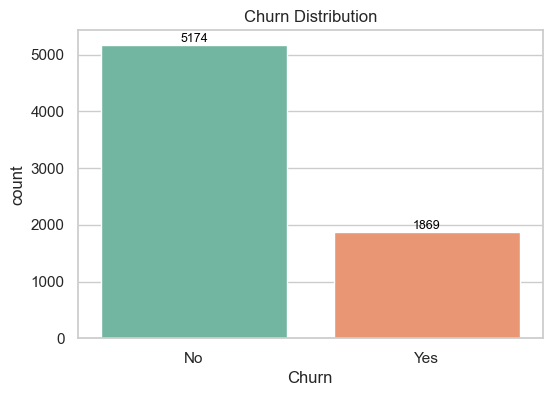

In [15]:
# Chart 1: Churn Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)
add_counts(ax)
plt.title("Churn Distribution")
plt.show()
# Insight: Shows overall churn % — helps know retention problem.

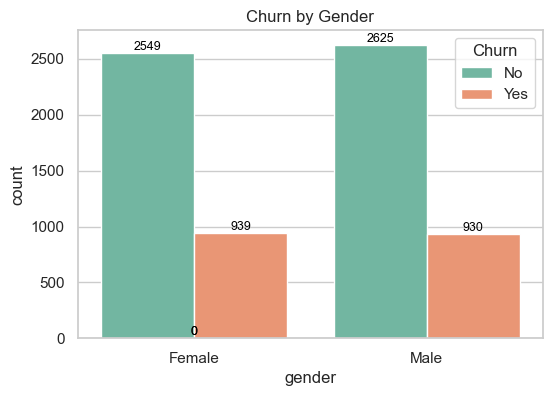

In [16]:
# Chart 2: Churn by Gender
# -----------------------
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
add_counts(ax)
plt.title("Churn by Gender")
plt.show()
# Insight: See if gender has major churn difference.

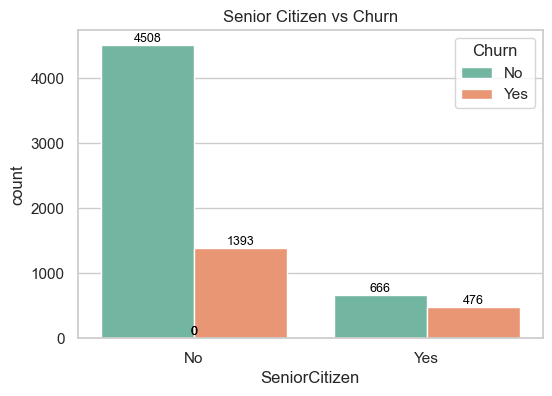

In [17]:
# Chart 3: SeniorCitizen Churn
# -----------------------
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Set2')
add_counts(ax)
plt.title("Senior Citizen vs Churn")
plt.show()
# Insight: Senior customers churn rate is higher/lower.


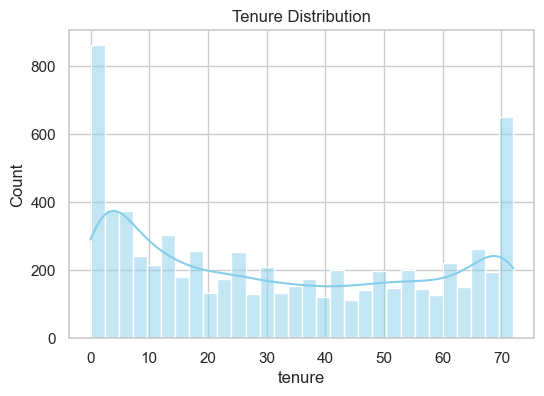

In [18]:
# Chart 4: Tenure Distribution (Histogram)
# -----------------------
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='tenure', bins=30, kde=True, color='skyblue')
plt.title("Tenure Distribution")
plt.show()
# Insight: Shows how long customers usually stay.

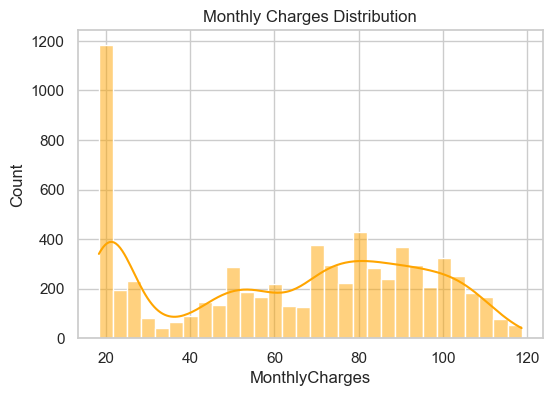

In [19]:
# Chart 5: Monthly Charges Distribution
# -----------------------
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='MonthlyCharges', bins=30, kde=True, color='orange')
plt.title("Monthly Charges Distribution")
plt.show()
# Insight: See if high-charge customers churn more.

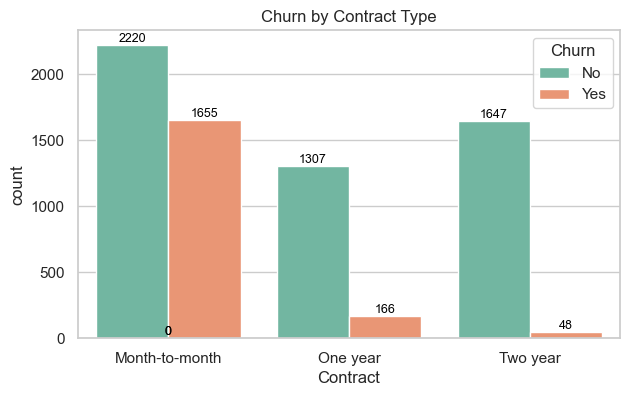

In [20]:
# Chart 6: Churn by Contract Type
# -----------------------
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
add_counts(ax)
plt.title("Churn by Contract Type")
plt.show()
# Insight: Month-to-month contracts churn higher.


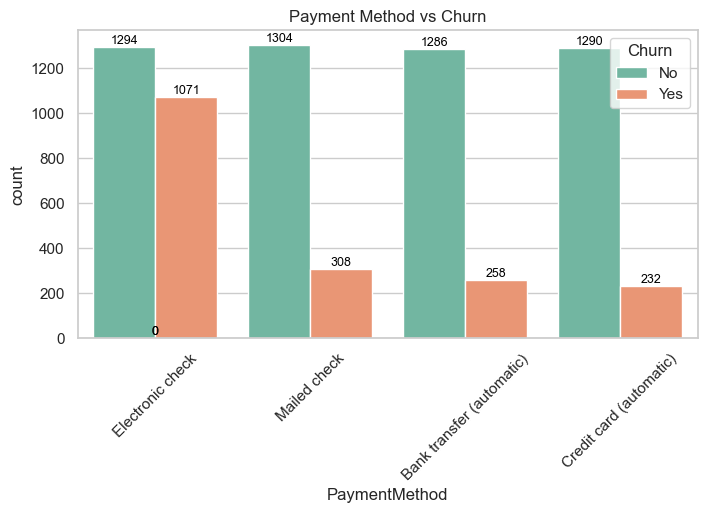

In [21]:
# Chart 7: Payment Method vs Churn
# -----------------------
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')
add_counts(ax)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()
# Insight: Certain payment methods link to higher churn.

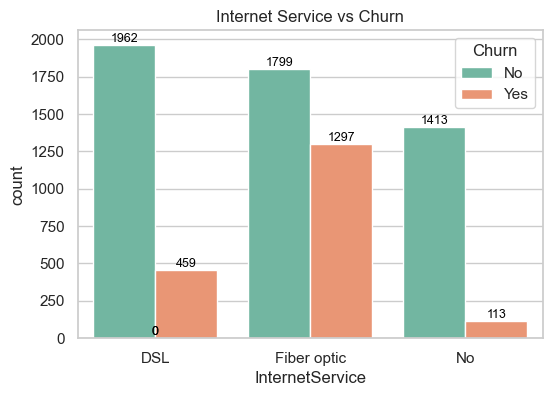

In [22]:
# Chart 8: Services Taken vs Churn (Internet Service)
# -----------------------
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2')
add_counts(ax)
plt.title("Internet Service vs Churn")
plt.show()
# Insight: Fiber optic users churn more.


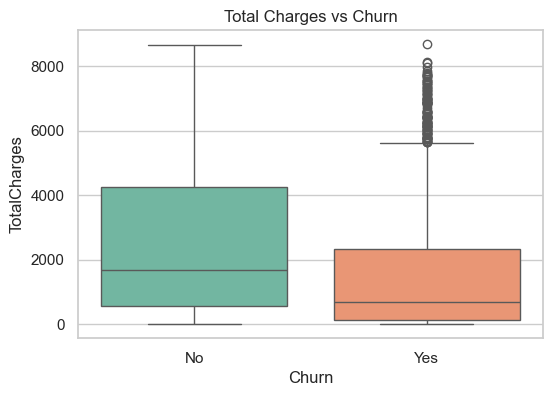

In [23]:
# Chart 9: Total Charges vs Churn (Boxplot) - Fixed
# -----------------------
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='TotalCharges', hue='Churn', palette='Set2', legend=False)
plt.title("Total Charges vs Churn")
plt.show()


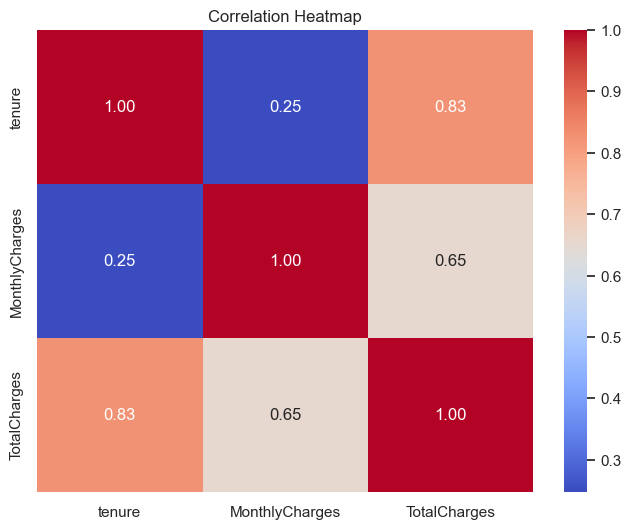

In [24]:
#Chart 10: Correlation Heatmap (Numeric Variables)
# -----------------------
plt.figure(figsize=(8, 6))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Insight: Tenure and TotalCharges are strongly correlated.

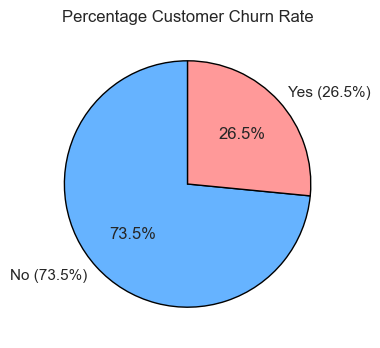

In [25]:
# Churn count અને percentage કાઢવું
churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts / churn_counts.sum() * 100

# Pie chart બનાવવું
plt.figure(figsize=(4,4))
plt.pie(churn_counts, 
        labels=[f"{label} ({percent:.1f}%)" for label, percent in zip(churn_counts.index, churn_percent)],
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#66b3ff', '#ff9999'],
        wedgeprops={'edgecolor': 'black'})

plt.title("Percentage Customer Churn Rate")
plt.show()